In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch

from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
plt.rcParams.update({'font.size': 15})

In [3]:
filepath = r'C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\predictions'
df = pd.read_csv(os.path.join(filepath,'OscNext_wnoise_classification_m27_2k10_test_predictions_2.csv'))

In [4]:
df

,Unnamed: 0,event_no,pid,nu_e,nu_mu,nu_tau,mu
0,0,13188815.0,13.0,-0.117435,0.157393,0.007128,0.229535
1,1,13188840.0,13.0,-0.840914,-0.820327,-0.708240,1.826397
2,2,13188844.0,13.0,-0.173427,-0.713343,-0.017263,0.702069
3,3,13188911.0,13.0,-0.397254,-0.359432,-0.362776,1.420002
4,4,13189105.0,13.0,-0.229810,-0.244434,-0.237355,1.008680
...,...,...,...,...,...,...,...
1658357,1658357,13168513.0,-16.0,1.011374,1.337695,0.910447,-3.937185
1658358,1658358,13171849.0,16.0,5.335851,4.285676,5.502590,-25.553329
1658359,1658359,13172518.0,-16.0,2.878613,4.234619,3.165523,-15.875237
1658360,1658360,13172584.0,-16.0,0.008902,0.221398,0.011988,0.709020


In [5]:
one_hot = np.ones((17))*10
one_hot[[12,14,16,13]] = np.array([0,1,2,3])

target = one_hot[np.abs(df.pid).astype(int)]

In [6]:
roc_curves = []
roc_aucs = []

for i in range(4):
    # roc_curves.append(roc_curve(target==i,pred[:,i]))
    roc_curves.append(roc_curve(target==i,torch.softmax(torch.tensor(df.iloc[:,-4:].values),1)[:,i]))
    roc_aucs.append(roc_auc_score(target==i,torch.softmax(torch.tensor(df.iloc[:,-4:].values),1)[:,i]))

[Text(0, 0.5, 'TPR'),
 Text(0.5, 0, 'FPR'),
 Text(0.5, 1.0, 'ROC curves for PID of level7 OscNext sample')]

C:\Users\jv97\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


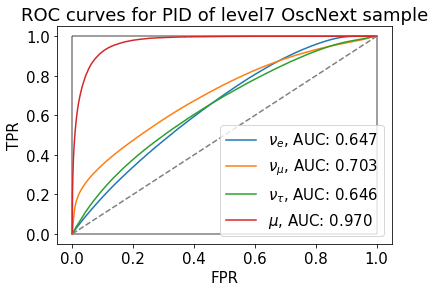

In [7]:
fig, ax = plt.subplots()
for i, (fpr,tpr,t) in enumerate(roc_curves):
    ax.plot(fpr,tpr,label=[r"$\nu_e$",r'$\nu_\mu$',r'$\nu_\tau$',r'$\mu$'][i]+', AUC: {:.3f}'.format(roc_aucs[i]))
ax.plot([0,1],[0,1],c='grey',ls='--')
ax.vlines([0,1],[0,0],[1,1],color='k',zorder=-1,alpha=0.5)
ax.hlines([0,1],[0,0],[1,1],color='k',zorder=-1,alpha=0.5)

ax.legend()
ax.set(title='ROC curves for PID of level7 OscNext sample',
       xlabel='FPR',
       ylabel='TPR')

In [8]:
# fig.savefig("plots/ROC_PID_lvl7OscNext.pdf")

C:\Users\jv97\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  """Entry point for launching an IPython kernel.


In [38]:
for s in [1,5,10,100]:
    tmp_auc_list = []
    for i in range(4):
        tmp_auc_list.append(roc_auc_score(target==i,torch.softmax(s*torch.tensor(df.iloc[:,-4:].values),1)[:,i]))
    print(*tmp_auc_list,sum(tmp_auc_list))

0.6329139577248152 0.6863247917069206 0.6319134176196018 0.9692670093936473 2.9204191764449847
0.6116737173363526 0.6858508368233539 0.6344614885286617 0.9692922899785247 2.9012783326668927
0.6060521581723837 0.6851510165744852 0.6325128562321616 0.9691593768848757 2.8928754078639063
0.6034836525120754 0.6805901557455698 0.6308225381571155 0.9494719747562597 2.8643683211710202


In [39]:
for s in [0.1,0.001,0.0001,0.00001]:
    tmp_auc_list = []
    for i in range(4):
        tmp_auc_list.append(roc_auc_score(target==i,torch.softmax(s*torch.tensor(df.iloc[:,-4:].values),1)[:,i]))
    print(*tmp_auc_list,sum(tmp_auc_list))

0.6006543489843323 0.6246497166854393 0.5473021015288388 0.9686943362867907 2.741300503485401
0.5863840143292207 0.593712899120228 0.5351171365771642 0.9685655867717649 2.683779636798378
0.5862426290533892 0.5934627043613271 0.5350388882479891 0.9685643506073923 2.683308572270098
0.5862284953223056 0.5934377383018873 0.5350310909552213 0.9685642300536713 2.6832615546330856
